In [1]:
import pennylane as qml
import numpy as np

In [99]:
import pennylane as qml
import numpy as np


lookup_table = {
    "000":"01",
    "001":"10",
    "010":"11",
    "011":"11"
}

def qrom(lookup_table):
    """A subroutine that applies gates to implement the qROM oracle.

    This particular qROM should work with variable n-bit address register with
    m-bit data values at each location. Given an address register prepared in
    the address |a> = |a0 a1 ... an> to query at, the qROM should write the
    contents of the address |b_a> = |b_a0 b_a1 ... b_am> to a data register,
    like so:
           _______
     a0 ---|     |--- a0
     a1 ---|  q  |--- a1
     .. ---|  R  |--- ..
     an ---|  O  |--- an
      0 ---|  M  |--- b_a0
     .. ---|     |--- ..
      0 ---|     |--- b_am
           -------

    Args:
        lookup_table (Dict[str, str]): The contents of the memory, in the form
            {address: contents} where address is an n-bit string, and contents is
            an m-bit string (see examples in test cases).
    """
    # YOUR CODE HERE
    return lookup_table


def problem_3(lookup_table):
    """Implement a quantum lookup table, or qROM.

    A few things to note:
        - the same QNode will be used for any address in the lookup table; only a different
          address will be passed each time
        - some addresses may not have any data stored at them; consider
          |b_a> = |0...0> for this case.
        - you can assume there will be no repeated addresses in the lookup table

    Args:
        lookup_table (Dict[str, str]): The contents of the memory, in the form
            {address: contents} where address is an n-bit string, and contents is
            an m-bit string (see examples in test cases).

    Returns:
        qml.QNode: Your qROM QNode. The QNode itself should return a single
        sample obtained from measuring the data wires.
    """

    # YOUR CODE HERE: create a device of appropriate size, with shots=1
    addr = range(3)
    data = range(3, len(addr)+2)
    dev = qml.device("default.qubit", wires=len(addr)+len(data), shots=1)

    @qml.qnode(dev)
    def query_qrom(address=None):
        """Query the qROM at the provided address.

        This QNode should make use of the qROM oracle you implemented above.

        Args:
            address (str): An n-bit string indicating the address to query at.

        Returns:
            array[int]: Results of measuring a single sample of the data wires
            (corresponds to the content of the qROM at the input address). The
            length of the sample should be m.
        """

        # qml.PauliX(wires=[0])
        # qml.PauliX(wires=[0])
        qml.PauliX(wires=[2])


        # qml.PauliX(wires=data[0])
        qml.MultiControlledX(control_wires=[addr[0]], wires=[data[1]])

        qml.MultiControlledX(control_wires=[addr[1]], wires=[data[0]])

        qml.MultiControlledX(control_wires=[addr[0], addr[1]], wires=[data[0]])
        qml.MultiControlledX(control_wires=[addr[0], addr[1]], wires=[data[1]])

        qml.MultiControlledX(control_wires=[addr[2]], wires=[data[0]])
        qml.MultiControlledX(control_wires=[addr[2]], wires=[data[1]])

        #
        # qml.MultiControlledX(wires=(addr[2],data[0]))
        #
        # qml.MultiControlledX(wires=(addr[1],data[0]))
        # qml.MultiControlledX(wires=(addr[1],data[1]))
        #
        # qml.MultiControlledX(wires=([addr[1], addr[2]],data[0]))
        # qml.MultiControlledX(wires=([addr[1], addr[2]],data[1]))



        # YOUR CODE HERE
        # return qml.sample(qml.Identity(wires=3)), qml.sample(qml.Identity(wires=4))
        # return qml.sample(wires=[4,3])
        return qml.sample(wires=[3,4])
    return query_qrom
    # return lookup_table

In [100]:
lookup_table = {
    "000":"01",
    "001":"10",
    "010":"11",
    "011":"11"
}

problem_3(None)()

tensor([1, 1], requires_grad=True)

/Users/nicolas/miniforge3/envs/quantum/lib/python3.10/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2289: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


(<Figure size 800x600 with 1 Axes>, <Axes: >)

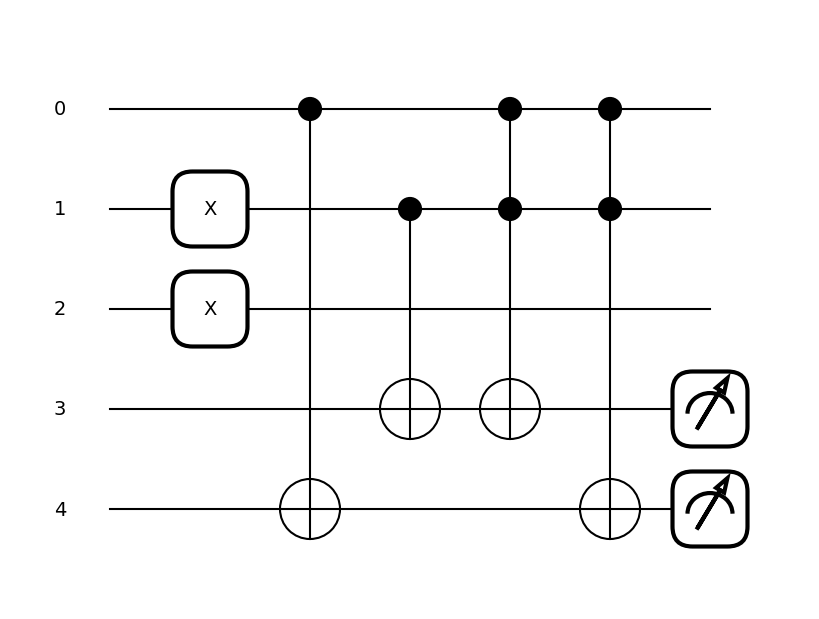

In [33]:
qml.draw_mpl(problem_3(None))()